In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from matplotlib import rc
rc('font', family='AppleGothic') 			## 애플 폰트 추가로
plt.rcParams['axes.unicode_minus'] = False  ## 한글 깨짐 방지

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

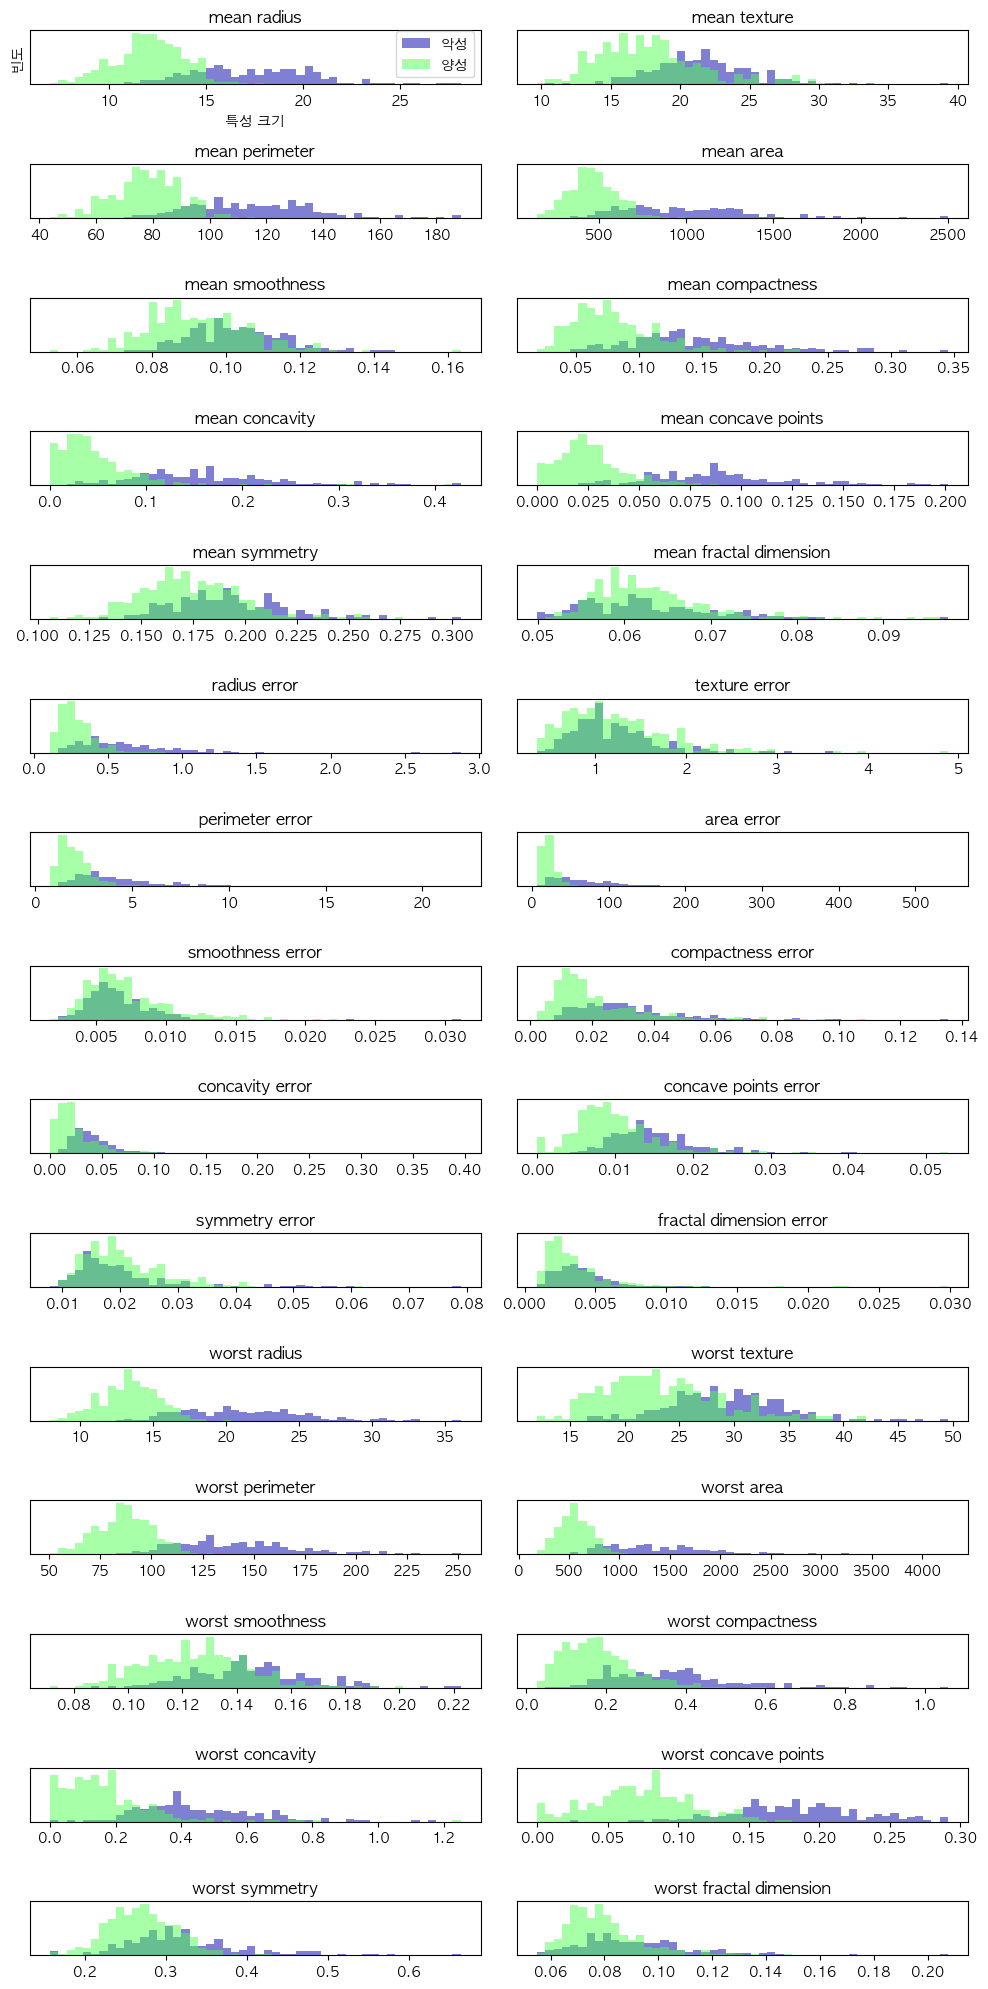

In [10]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
악성 = cancer.data[cancer.target == 0]
양성 = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(악성[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(양성[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

### 고유얼굴(eigenface) 특성 추출

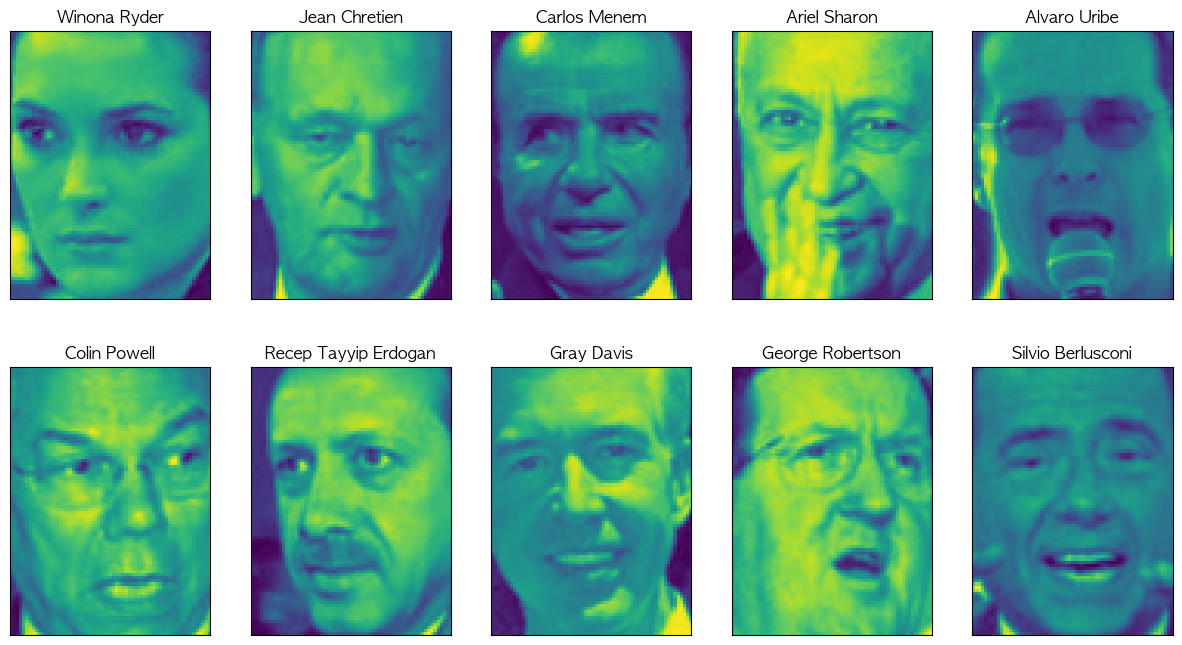

In [12]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [13]:
print("people.images.shape", people.images.shape)
print("클래스 개수:", len(people.target_names))

people.images.shape (3023, 87, 65)
클래스 개수: 62


In [15]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [ ]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1 # 각 클래스(target)에서 최대 50개씩 가져오기

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people / 255.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.22


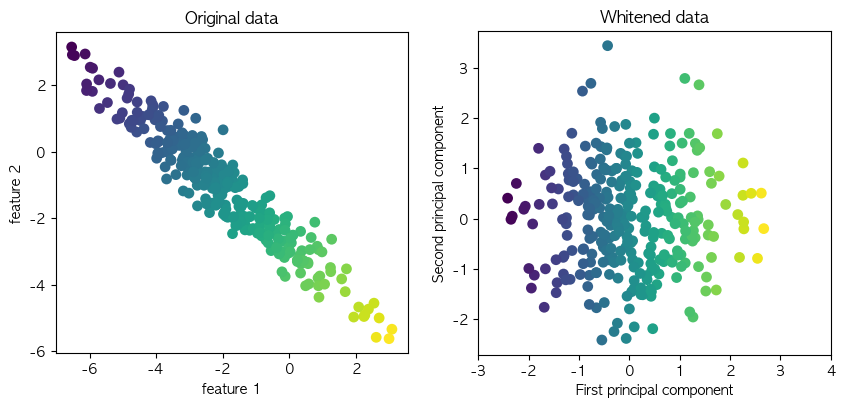

In [18]:
mglearn.plots.plot_pca_whitening()

In [19]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.30


In [22]:
print("pca.component_.shape", pca.components_.shape)

pca.component_.shape (100, 5655)


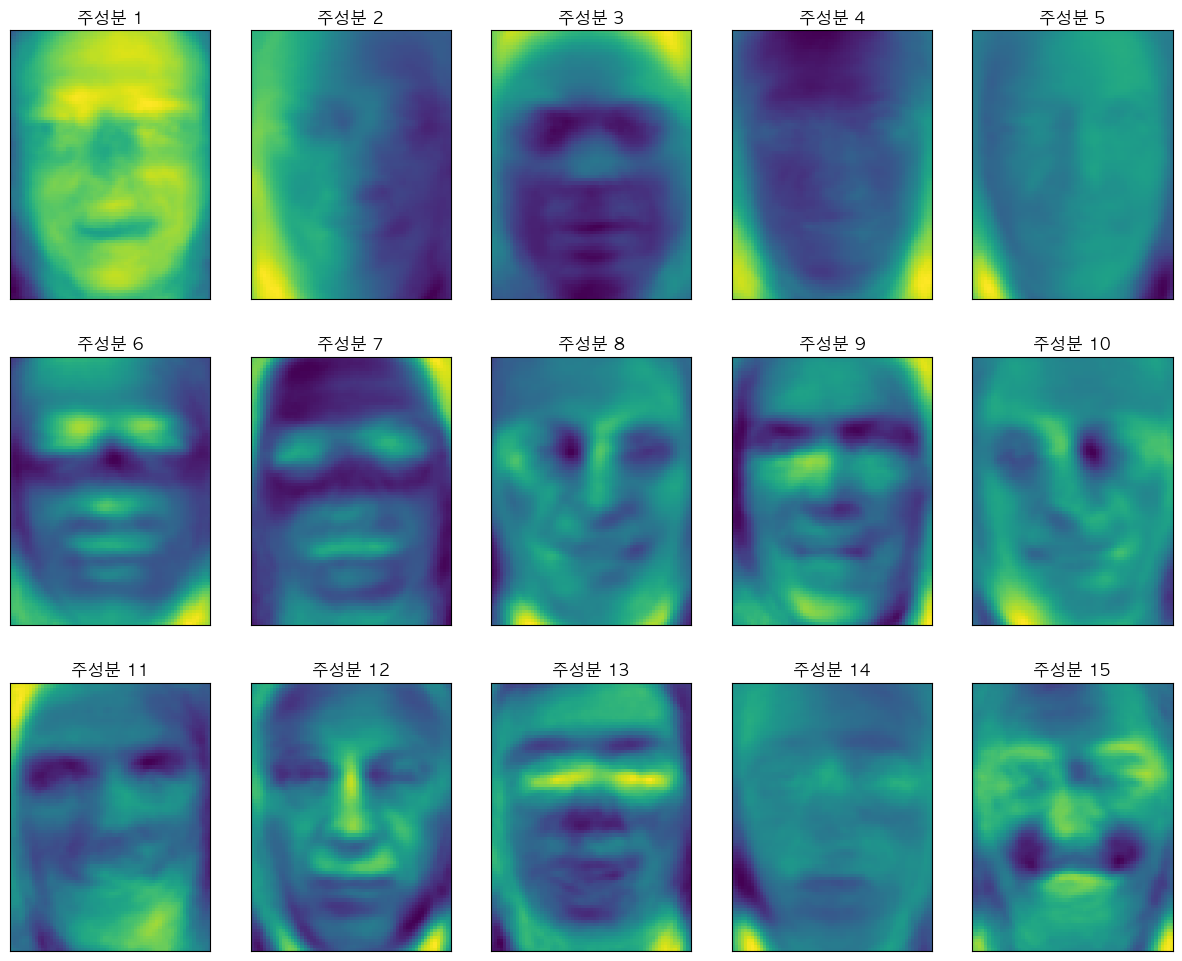

In [25]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i + 1)))

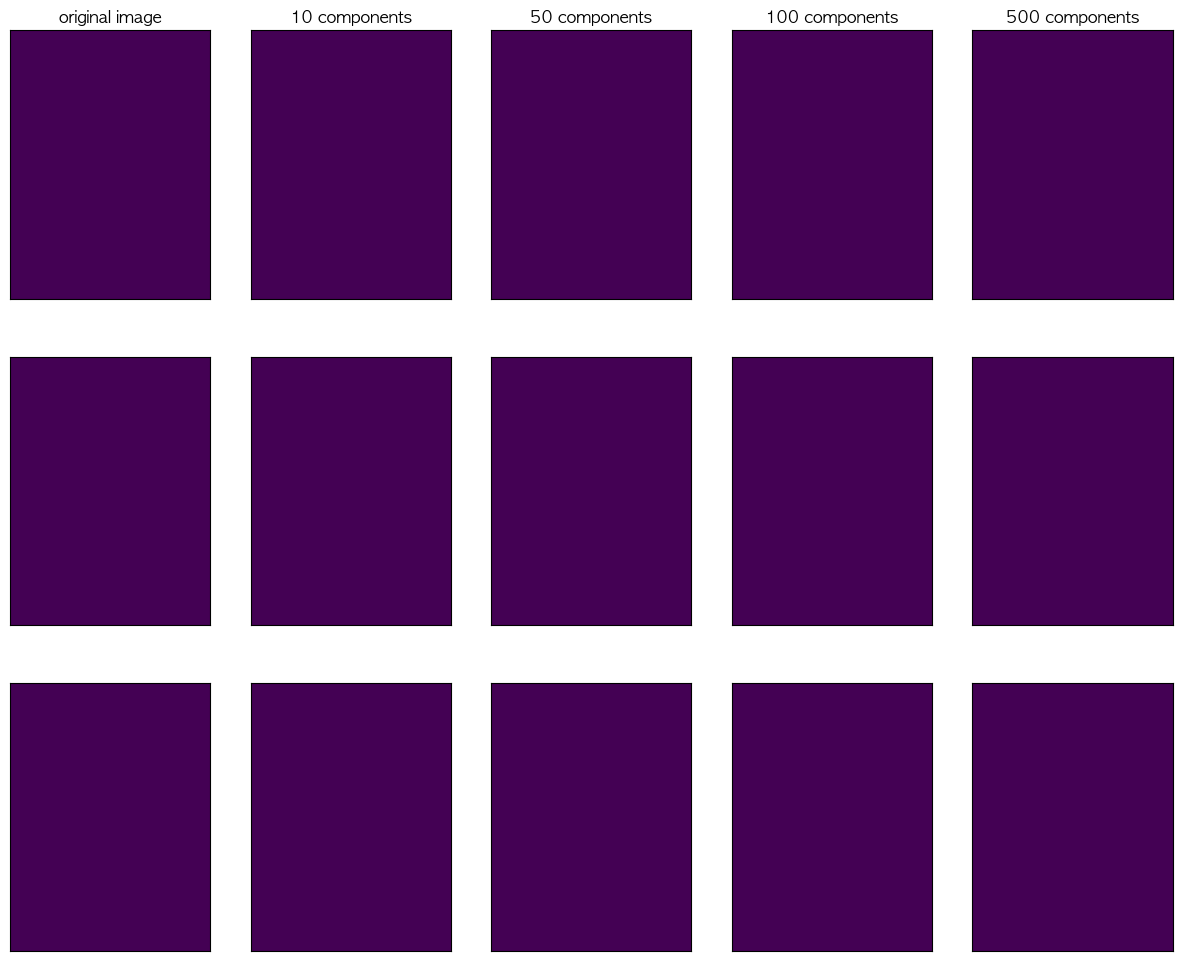

In [27]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

page 220